# Reinforcement Learning: An Introduction 2nd Edition - Example 6.5

Environment: [Example 6.5: Windy Gridworld](http://incompleteideas.net/book/bookdraft2017nov5.pdf#page=124)

## Environment Settings

I use same settings of the environment.

Observation:
* $7 \times 10$ grid
* 3 to 5, 8 columns - upward wind power 1
* 6 to 7 columns - upward wind power 2

Actions:
* up  
* down  
* left  
* right  

Hyperparameters:
* $\epsilon = 0.1$  
* $\alpha = 0.5$  
* $\gamma = 1$  
* 8000 episodes

Additional settings:
* $\epsilon$ linear decay

## Source Codes

In [21]:
import sarsa
from windy_gridworld import WindyGridworld
import numpy as np
import matplotlib.pyplot as plt

### Define test function

In [22]:
def test_env(env: WindyGridworld, sarsa: sarsa.Sarsa):
    shape_x, shape_y = env.obs_shape
    
    start_state = env.reset()
    goal_state = env.goal_state
    current_state = start_state
    
    trace_states = [current_state]
    total_rewards = 0
    
    # start an episode
    for i in range(1000):
        current_action = sarsa.get_action(tuple(current_state))
        next_state, reward, terminated = env.step(current_action)
        trace_states.append(next_state)
        total_rewards += reward
        
        if terminated:
            break
        
        current_state = next_state
        
    print(f"total rewards: {total_rewards}")
    
    trace_states = np.array(trace_states)
    
    # draw grid world
    plt.plot(trace_states[:,1], trace_states[:,0])
    plt.scatter(start_state[1], start_state[0], c="red", marker="x")
    plt.scatter(goal_state[1], goal_state[0], c="black", marker="x")
    plt.axis([-1, shape_y + 1, -1, shape_x + 1])
    plt.xticks(range(-1, shape_y + 2))
    plt.yticks(range(-1, shape_x + 2))
    plt.grid()
    plt.gca().invert_yaxis()
    plt.show()

### Before train

In [23]:
env = WindyGridworld()
windy_gridworld_sarsa = sarsa.Sarsa(env.obs_shape, env.action_count, [tuple(env.goal_state)])

obs shape: (7, 10), start state: [3 0], goal state: [3 7]
total rewards: -1000


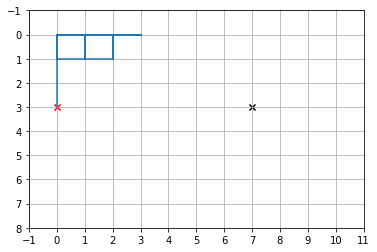

In [24]:
print(f"obs shape: {env.obs_shape}, start state: {env.state}, goal state: {env.goal_state}")

test_env(env, windy_gridworld_sarsa)

### Train

total rewards: -1000


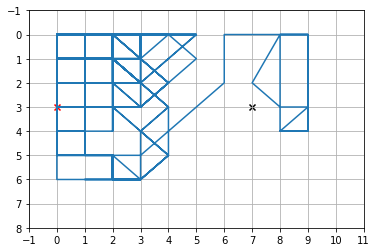

total rewards: -15


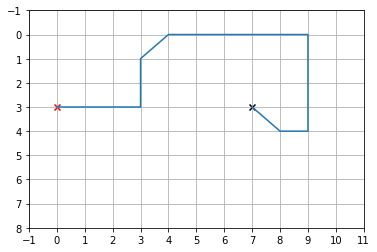

total rewards: -14


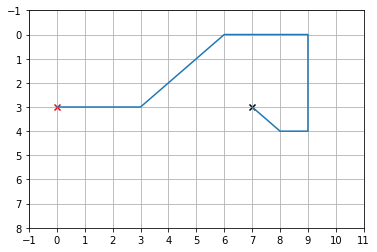

total rewards graph


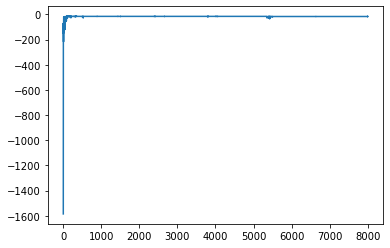

In [25]:
# hyperparameters
alpha = 0.5
gamma = 1
epsilon = 0.5
episodes_count = 8000

# records
rewards_arr = []

for episode in range(episodes_count + 1):
    current_state = env.reset()
    current_action = windy_gridworld_sarsa.get_action(tuple(current_state))
    terminated = False
    total_rewards = 0
    windy_gridworld_sarsa.epsilon = epsilon / (episode + 1) # epsilon linear decay
    # start an episode
    while not terminated:
        # observe R, S'
        next_state, reward, terminated = env.step(current_action)
        
        transition = sarsa.Transition(
            tuple(current_state),
            current_action,
            tuple(next_state),
            reward
        )
        
        # update q-values
        next_action = windy_gridworld_sarsa.update(transition, alpha=alpha, gamma=gamma)
        
        total_rewards += reward
        current_state = next_state
        current_action = next_action
        
    rewards_arr.append(total_rewards)
    
    # test the environment
    if episode % 4000 == 0:
        test_env(env, windy_gridworld_sarsa)
    
print("total rewards graph")
plt.plot(rewards_arr)
plt.show()